# Document 2. Twitter Scraper using Selenium
#  
 
## Aim
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> 
To identify gender bias in science, technology, engineering and mathematics (STEM) in language data and prototype a method to identify the source of this bias, in order to address it.

## Rationale
    
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> There is a gender imbalance in STEM careers (Robnett, 2016). In 2016, women were particularly underrepresented in IT and engineering, comprising 28% and 12.4% of the workforce, respectively (Australian Government, 2019). Because gender disparities are rooted in cultural norms, values and discourse (Robnett, 2016), it is expected that this imbalance should appear as bias in language data (Sun et al., 2019; Zhao et al., 2018). This bias may even be amplified in any predictions made based on language data (Sun et al. 2019).
    
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> 
Natural Language Processing (NLP) is the application of data science and analytics to human language (Chowdhury, 2003). Language comprises some of the richest and most complex data available, and can provide nuanced insights to virtually any topic, in terms of human thoughts and reactions to different phenomena (Chowdhury, 2003; Hirschberg and Manning, 2015). Unsurprisingly, the rise of social media has provided a bounty of data for NLP applications. In 2020, 500 million Tweets were published daily on social media site Twitter, providing an extensive range of language data on a multitude of different topics (Sayce, 2020). Social media platforms, such as Twitter, behave as a largely uncensored, global-scale historical record from the perspective of everyday members of society (Neethu, 2013), not just the powerful and privileged, as has been the case in the past (although, importantly, and in line with the topic of this report, Tweets written by people of colour are more likely to be flagged as offensive and removed by machine learning algorithms (Wei, 2020)).
    
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> 
Because this investigation seeks to research implicit gender bias in STEM-related topics, and because gender bias is a social issue, it is sensible to look for data where people produce a high volume of text. Because Twitter can be treated as a repository of people’s opinions and attitudes, and therefore their personal biases, it naturally harbours the biases of society in general, making Twitter an ideal source of data for sentiment analysis (Neethu, 2013). 
    
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> 
Scraping data from Twitter, using specific search terms, allows targeted collection of information and ensures that the data collected are relevant to this investigation. For these reasons, Twitter is the sole website from which data were extracted.





In [3]:
# Import packages
import pandas as pd
import numpy as np
from getpass import getpass
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from webdriver_manager.chrome import ChromeDriverManager
import csv
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks
import matplotlib.ticker as mtick
from matplotlib.ticker import StrMethodFormatter


##     
## Methodology
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> 
This report will analyse language data bias in STEM, with respect to gender, using <b>Python version 3.9.0</b>. The methodology is as follows: 
 
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> 
* <span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'>Scrape tweets about STEM, relating to people.
* <span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'>Clean the data so it can be used in NLP tasks.
* <span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'>	Investigate the number of STEM-related tweets containing female pronouns vs male pronouns.
* <span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'>Report findings from a preliminary exploration of these data.
* <span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'>Identify the source of bias using a combination of supervised classification and sentiment analysis.

<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> 
Although Twitter has an API which can be used for academic purposes, in line with the task requirements Selenium was used to simulate a search within a browser and data were collected using <b>xpath()</b>. The search term was <i>(science OR scientist OR technology OR technologist OR engineering OR engineer OR math OR mathematics OR mathematician) (she OR her OR he OR him) -filter: retweets</i>.
##    
## Webscraper  
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> The data from Twitter were complicated to extract because the site is complex and the content is continuously updating. Due to the perpetual scrolling nature of the site, it was decided that the best way to scrape Tweet data (other than using the API) would be using the <b>Selenium</b> package. Selenium works by automating web browser activity, replicating functions such as opening a browser, clicking on links and scrolling pages (Silman, 2019). The package requires installation of a driver to interface with a browser (Chrome was used in this case).
    
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> 
Selenium was used to open, log in, navigate and enter a search term to scrape Tweet data while scrolling downwards, allowing new Tweets to appear. The <b>xpath()</b> function was used to select specific data from each Tweet. Username, handle, Tweet and the number of replies, retweets, likes and the post date were retrieved. <i>Figure 1</i> shows the webscraper in progress.

> 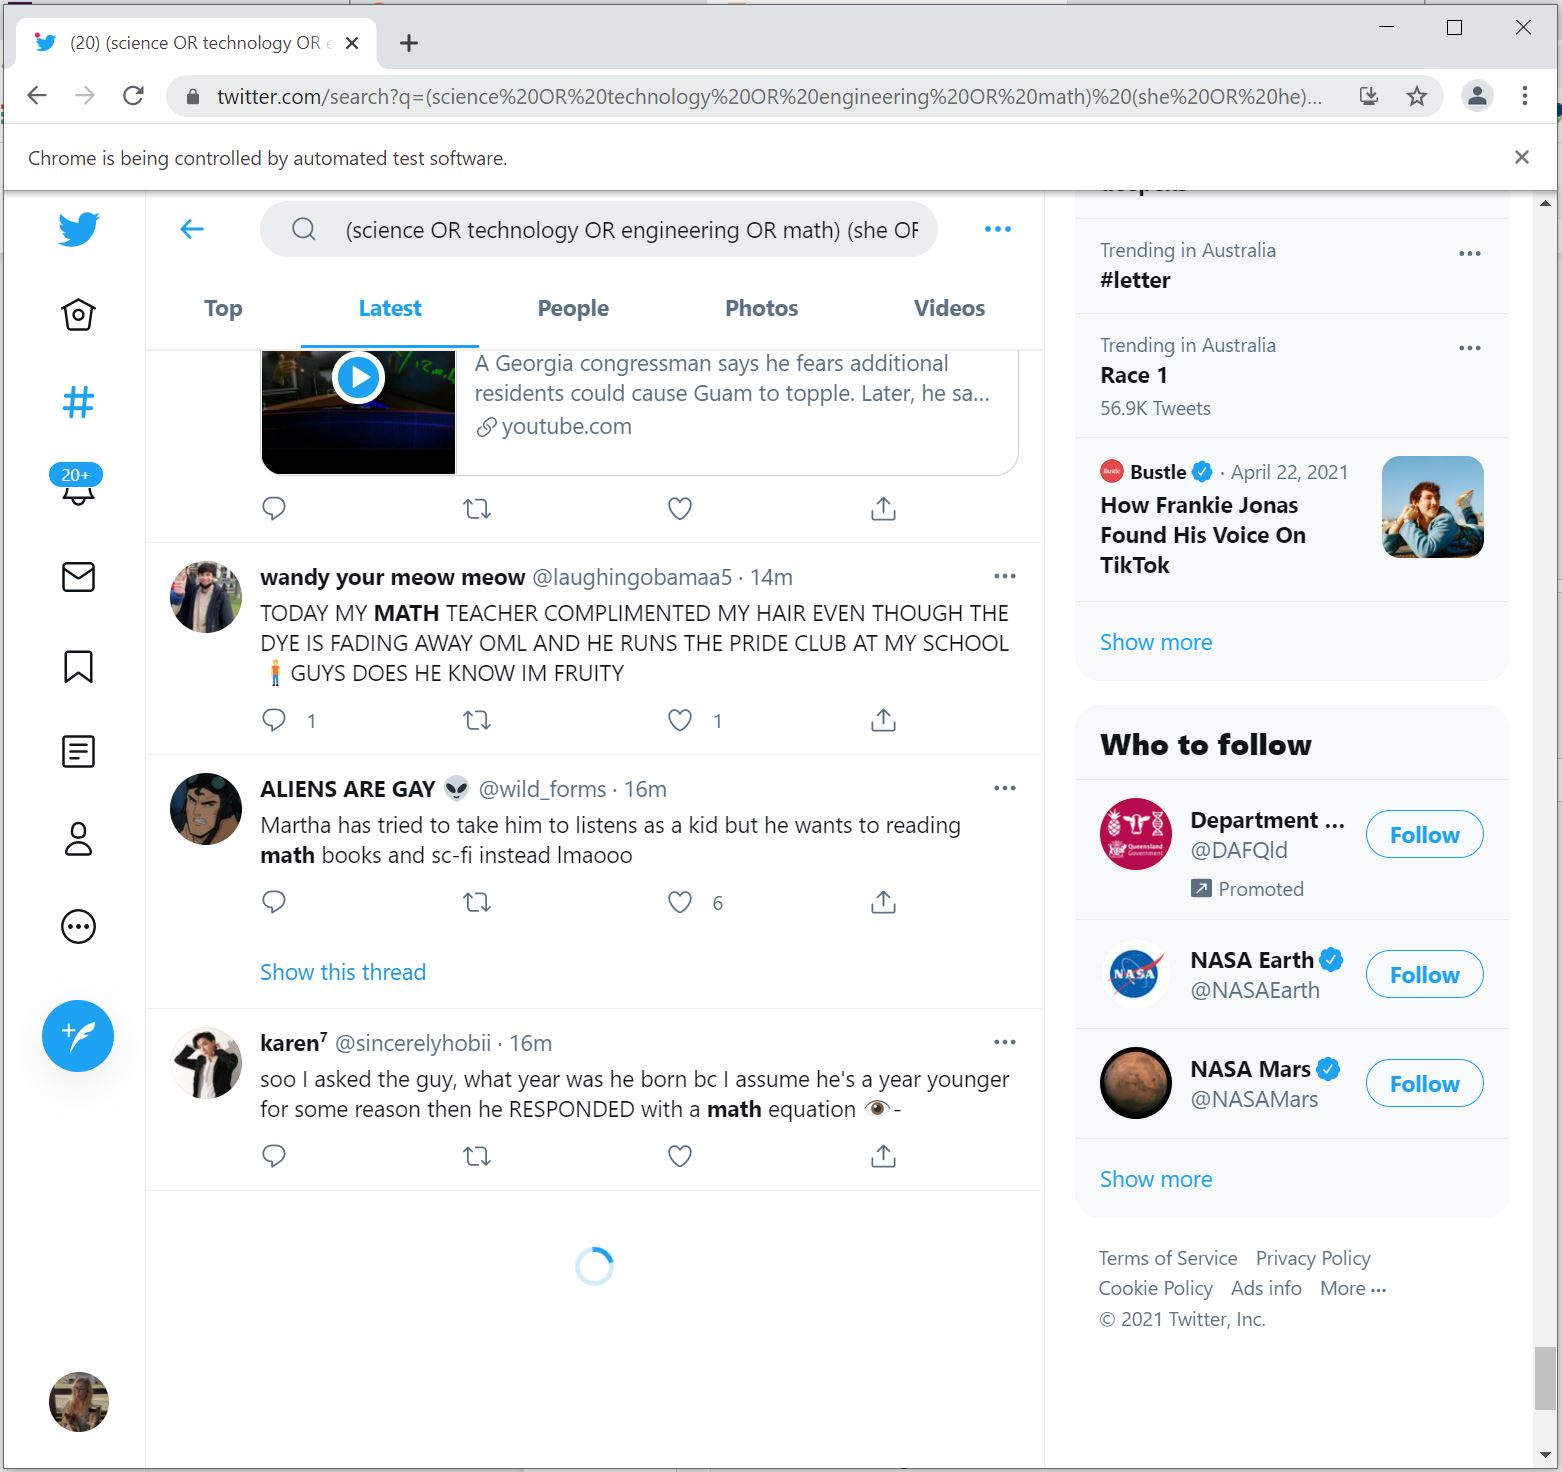
> Figure 1: The webscraper in action

##   
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> 
After identifying issues with the running of the webscraper, modifications were made to the code to catch two types of exception: <b>NoSuchElementException</b>, which can occur when the scraper attempts to access an element before the page has fully loaded, and <b>StaleElementReferenceException</b>, which occurs when some element is temporarily inaccessible. Elements were identified and extracted using the HTML inspect navigation panel corresponding to the page in the Chrome browser (<i>Figure 2)</i>:
##     
> 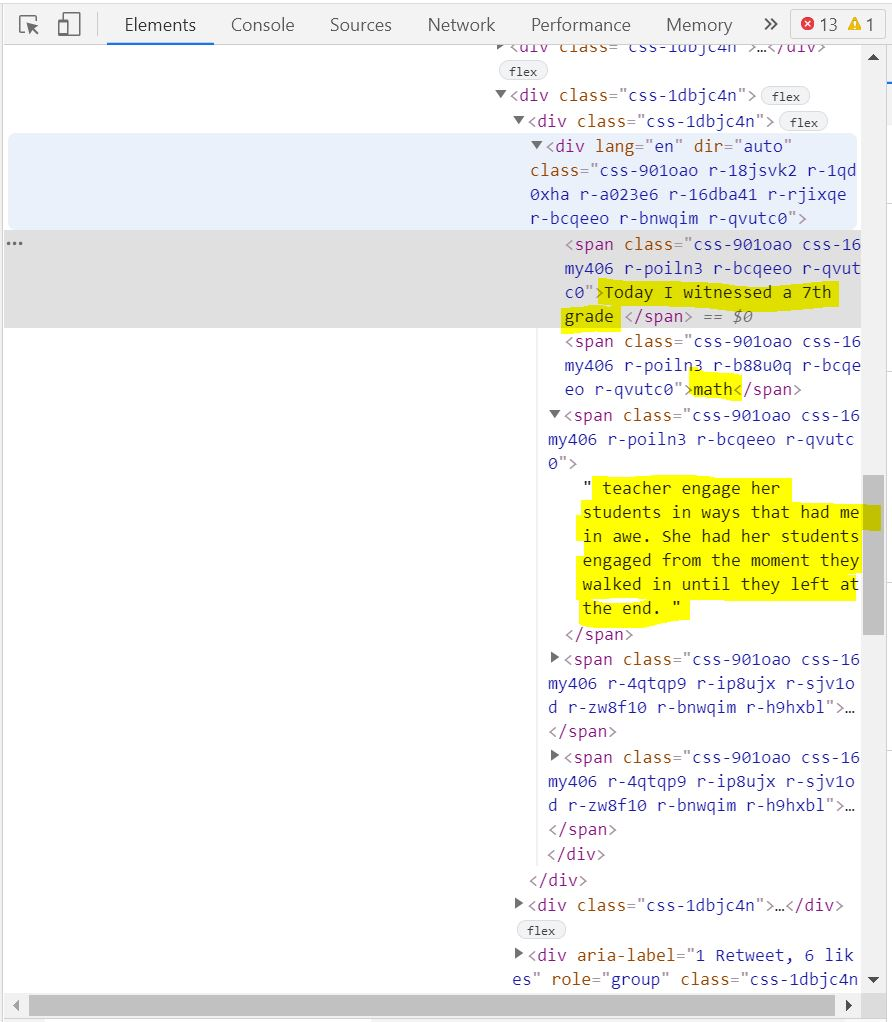
> Figure 2: Tweet withn Inspect panel


In [2]:
# Function to scrape Twitter using Selenium

def get_tweet_data(card):
    #Extract tweet data
    #username
    try:
        username = card.find_element_by_xpath('.//span').text
    except NoSuchElementException:
        return
    except StaleElementReferenceException:
        return
    #twitter handle
    try:
        handle = card.find_element_by_xpath('.//span[contains(text(), "@")]').text
    except NoSuchElementException:
        return
    except StaleElementReferenceException:
        return
    #tweet text
    try:
        comment = card.find_element_by_xpath('.//div[2]/div[2]/div[1]').text
        responding = card.find_element_by_xpath('.//div[2]/div[2]/div[2]').text
        text = comment+responding
    except NoSuchElementException:
        return
    except StaleElementReferenceException:
        return
    #reply count
    try:
        comment = card.find_element_by_xpath('//div[@data-testid="reply"]').text
    except NoSuchElementException:
        return
    except StaleElementReferenceException:
        return
    #retweet count
    try:
        retweet = card.find_element_by_xpath('//div[@data-testid="retweet"]').text
    except NoSuchElementException:
        return
    except StaleElementReferenceException:
        return
    #likes
    try:
        like = card.find_element_by_xpath('//div[@data-testid="like"]').text
    except NoSuchElementException:
        return
    except StaleElementReferenceException:
        return
    try:
        #post date
        date = card.find_element_by_xpath('.//time').get_attribute('datetime')
    except NoSuchElementException:
        return
    except StaleElementReferenceException:
        return
    
    tweet = (username, handle, text, comment, retweet, like, date)
    return tweet 

# create instance of webdriver
driver = webdriver.Chrome()
driver.get('https://www.twitter.com/login')


In [3]:
#navigate to twitter and login
username = driver.find_element_by_xpath('//input[@name="session[username_or_email]"]')
username.send_keys('laura.vodden@outlook.com')
mypassword = getpass()

password = driver.find_element_by_xpath('//input[@name="session[password]"]')
password.send_keys(mypassword)
password.send_keys(Keys.RETURN)


········


In [5]:
#find search input and search for term

#navigte to 'explore' tab
driver.find_element_by_xpath('//a[@data-testid="AppTabBar_Explore_Link"]').click()

search_input = driver.find_element_by_xpath('//input[@aria-label="Search query"]')
search_input.send_keys('(science OR technology OR engineering OR math OR mathematics OR scientist OR technologist OR engineer OR mathematician) (she OR her OR he OR him) -filter:retweets')
search_input.send_keys(Keys.RETURN)

#navigte to 'latest' tab
driver.find_element_by_link_text('Latest').click()

# get all tweets on the page
data = []
tweet_ids = set()
last_position = driver.execute_script("return window.pageYOffset;")
scrolling = True

while scrolling:
    page_cards = driver.find_elements_by_xpath('//div[@data-testid="tweet"]')
    for card in page_cards[-15:]:
        tweet = get_tweet_data(card)
        if tweet:
            tweet_id = ''.join(tweet)
            if tweet_id not in tweet_ids:
                tweet_ids.add(tweet_id)
            data.append(tweet)
    
    scroll_attempt = 0
    while True:
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        sleep(1)
        curr_position = driver.execute_script("return window.pageYOffset;")
        if last_position == curr_position:
            scroll_attempt += 1
            
            #end of scroll region
            if scroll_attempt >= 3:
                scrolling = False
                break
            else:
                sleep(2) # attempt to scroll again
        else:
            last_position = curr_position
            break

#save tweet data
with open('stem_tweets_2.csv', 'w', newline='', encoding='utf-8') as f:
    header = ['Username', 'Handle', 'Text', 'Comments', 'Retweets', 'Likes', 'Date']
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(data)

##     
## Viewing the scraped data
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> Once the scraper had collected all the data, the information was saved to a .csv file. <i>Table 1</i> shows the resulting dataset comprised over 34,000 records of STEM-related tweets from April 14, 2021 (the day of collection).


In [3]:
# Ipmort data and view dataframe head
tweets_df = pd.read_csv("stem_tweets.csv", dtype=object)
tweets_df = tweets_df.fillna(0)
tweets_df.head(10)

,Username,Handle,Text,Comments,Retweets,Likes,Date
0,Angi,@AngiMaryssa,"Blackwell is great. As a lawyer, you have to b...",0,0,0,2021-04-14T20:32:29.000Z
1,Señor Luis (1LUV),@thiccbb69,"math dumb af, if y=mx+b then y=tf don't she lo...",0,0,0,2021-04-14T20:32:24.000Z
2,Jared Halpern,@JaredEHalpern,"Wow, he was a hell of an engineer --Grant Imah...",0,0,0,2021-04-14T20:32:23.000Z
3,Bob Brigham,@BobBrigham,Matt Kelley is so bad he thinks coronavirus is...,0,0,0,2021-04-14T20:32:10.000Z
4,AlaskanTzar,@AlaskanTzar,Replying to \n@science_bradyBut he was?,0,0,0,2021-04-14T20:31:58.000Z
5,word vomit (erika),@vomit_bestie,that math test i just took was my absolute bit...,0,0,0,2021-04-14T20:31:55.000Z
6,Thomas Howard Riley MAD SCIENTIST of EPIC FANTASY,@ornithopteryx,Replying to \n@R_M__AndrewsOMG that is so funn...,0,0,0,2021-04-14T20:31:43.000Z
7,m d ryan,@hawkdynasty526,Replying to \n@Mhal2005\n and \n@Kr8ckenyou’re...,0,0,0,2021-04-14T20:31:40.000Z
8,Stephen,@Steve_ForChange,Replying to \n@716babe\n @StephieKonicki\n and...,0,0,0,2021-04-14T20:31:33.000Z
9,catlady,@suchmeerkat,Replying to \n@shaTIRED5th grade he had everyo...,0,0,0,2021-04-14T20:31:18.000Z


##     
## Data cleaning 

<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> There were several necessary steps involved in preparing the Tweet data for analysis using NLP methods. First, user handles were removed using a lambda function targeting the @ symbol before user handles. After this, the remaining punctuation, special characters were removed. Furthermore, a new column was generated with values ‘M’ or ‘F’, corresponding to male or female, depending on which pronouns were present in the original Tweet, and a final ‘Topic’ column containing the relevant STEM field.

<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> The resulting dataframe contained 25,365 rows, with four columns containing the User Handle, the text of each Tweet, and the subject gender (<i>Table 2</i>). The dataframe was saved as a .csv file for later use.



In [10]:
# Remove handles
tweets_df['Text'] =  tweets_df['Text'].apply(lambda x: re.sub('@[\w]+','', str(x)))

#Remove punctuation
# remove 's, 'll, 'd  
tweets_df['Text'] = tweets_df['Text'].str.replace("'s","")
tweets_df['Text'] = tweets_df['Text'].str.replace("'ll","")
tweets_df['Text'] = tweets_df['Text'].str.replace("'d","")
tweets_df['Text'] = tweets_df['Text'].str.replace("Replying to ","")
tweets_df['Text'] = tweets_df['Text'].str.replace("\n","")
 

def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

tweets_df['Text']=tweets_df['Text'].apply(lambda x: remove_punctuation(x))


# Assign a gender to each tweet based on pronouns present
tweets_df.loc[tweets_df['Text'].str.contains(' he '), 'Gender'] = 'M'
tweets_df.loc[tweets_df['Text'].str.contains('He '), 'Gender'] = 'M'
tweets_df.loc[tweets_df['Text'].str.contains(' him '), 'Gender'] = 'M'
tweets_df.loc[tweets_df['Text'].str.contains(' she '), 'Gender'] = 'F'
tweets_df.loc[tweets_df['Text'].str.contains('She'), 'Gender'] = 'F'
tweets_df.loc[tweets_df['Text'].str.contains(' her '), 'Gender'] = 'F'

# Assign a topic to each tweet based on topic in text
tweets_df.loc[tweets_df['Text'].str.contains('science'), 'Topic'] = 'science'
tweets_df.loc[tweets_df['Text'].str.contains('scientist'), 'Topic'] = 'science'
tweets_df.loc[tweets_df['Text'].str.contains('technology '), 'Topic'] = 'technology'
tweets_df.loc[tweets_df['Text'].str.contains('technogist'), 'Topic'] = 'technology'
tweets_df.loc[tweets_df['Text'].str.contains('engineering'), 'Topic'] = 'engineering'
tweets_df.loc[tweets_df['Text'].str.contains('engineer'), 'Topic'] = 'engineering'
tweets_df.loc[tweets_df['Text'].str.contains('math'), 'Topic'] = 'mathematics'
tweets_df.loc[tweets_df['Text'].str.contains('mathematics'), 'Topic'] = 'mathematics'
tweets_df.loc[tweets_df['Text'].str.contains('mathematician'), 'Topic'] = 'mathematics'


tweets_df = tweets_df[["Handle", "Text", "Likes", "Gender", "Topic"]]


# Drop any rows containing blanks
tweets_df = tweets_df.replace(r'^\s*$', np.nan, regex=True)
tweets_df = tweets_df.dropna()

# Shuffle data
tweets_df = tweets_df.sample(frac=1).reset_index(drop=True)

tweets_df.head(10)

,Handle,Text,Likes,Gender,Topic
0,@KellyLovesBirds,he loves science so much why did he kill his ...,0,M,science
1,@Annie447,18 year old daughter got her vaccine today w...,3,F,science
2,@LXV,and Musk isnt an engineer He a marketer Maa...,39,M,engineering
3,@wvu999,core math Oh wait she too old for common core,31,F,mathematics
4,@Pathfinder4545,and Yeah dont ask a physicist to explain th...,1,F,science
5,@empathspeaks,If the existence of a painting is enough proof...,1,M,science
6,@scribblerdc,2nd engineer visit due today only to be told ...,2,M,engineering
7,@IAmLordKPS,Why was so confused seeing Bunnies He knows i...,0,M,mathematics
8,@NDSUSMINOR,Reagan Mulqueen 20 partnered with Frank Fransi...,0,F,science
9,@CatholicUalumni,“I saw for myself how applications of science ...,0,F,science


In [73]:
# Save to csv
tweets_df.to_csv ('tweets_df.csv', index = None, header=True)

##   
## Exploratory Data Analysis
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> Preliminary analysis of the scraped data show, as expected, a strong bias in gender. In general, there are twice as many Tweets about men in relation to STEM as there are about women (66.5% and 33.5%, respectively) (<i>Figure 3</i>). In terms of gender, the dataset is unbalanced, which has implications for NLP tasks like classification. This trend is reflected within each of the STEM topics individually (<i>Figure 4</i>). The greatest discrepancy in men and women is shown in engineering, where female pronouns accompany less than 30% of all engineering Tweets. The smallest discrepancy is in mathematics, with female pronouns appearing in 39% of all Tweets about mathematics.

<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> <i>Figure 5</i> shows that the vast majority of Tweets are on the topic of science in general, comprising almost 9,000 of the total 17,000 Tweets. These preliminary results reflect the broader issue of female representation in STEM-related fields.

Count of STEM Tweets by gender
M    11514
F     5799
Name: Gender, dtype: int64

Total Tweets: 17313
Percentage of STEM Tweets by gender
M    0.665049
F    0.334951
Name: Gender, dtype: float64



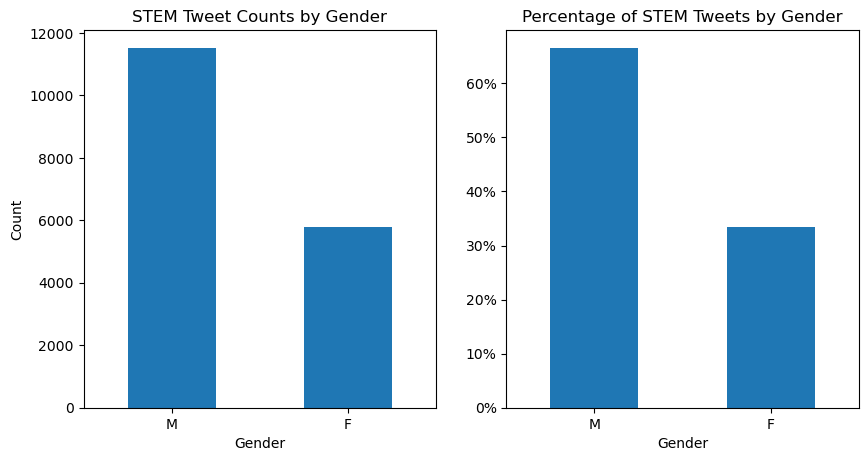

Figure 3: Count and percentage of Tweets by gender


In [4]:
# Import data
tweets_df = pd.read_csv("tweets_df.csv", dtype=object)

# Count tweets about women vs men
print("Count of STEM Tweets by gender")
counts = tweets_df['Gender'].value_counts()
print(counts)
print()
print("Total Tweets:", len(tweets_df))

print("Percentage of STEM Tweets by gender")
prop = tweets_df['Gender'].value_counts(normalize=True)
print(prop)
print()

figure(figsize=(10, 5), dpi=100)
plt.subplot(1, 2, 1)
counts.plot(kind = 'bar')
plt.title('STEM Tweet Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
xticks(rotation=0)

plt.subplot(1, 2, 2)
prop.plot(kind = 'bar')
plt.title('Percentage of STEM Tweets by Gender')
plt.xlabel('Gender')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
xticks(rotation=0)
plt.show()

print("Figure 3: Count and percentage of Tweets by gender")

Count of STEM Tweets by gender
M    11514
F     5799
Name: Gender, dtype: int64

Figure 4: Gender proportions by topic, showing gender imbalance across fields.


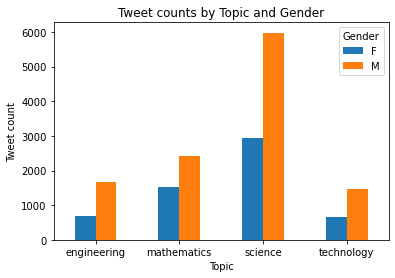

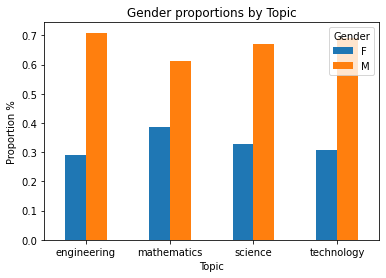

Figure 5: Tweet counts by gender across fields.


In [5]:
print("Count of STEM Tweets by gender")
#counts = tweets_df['Gender'].
print(counts)
print()

gender_counts = tweets_df.groupby(['Topic', 'Gender']).Gender.count().unstack()
gender_prop = tweets_df.groupby(['Topic', 'Gender']).size().groupby('Topic').transform(lambda x: x/x.sum()).unstack()




gender_counts.plot(kind='bar')
plt.title('Tweet counts by Topic and Gender')
plt.xlabel('Topic')
plt.ylabel('Tweet count')
plt.xticks(rotation = 0)
print("Figure 4: Gender proportions by topic, showing gender imbalance across fields.")

gender_prop.plot(kind = 'bar' )
plt.title('Gender proportions by Topic')
plt.ylabel('Proportion %')
xticks(rotation=0)

plt.rcParams["figure.figsize"] = (15,5)

plt.show()

print("Figure 5: Tweet counts by gender across fields.")

##     
## Website/data copyright considerations
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> Even though Tweets are protected under copyright, this is an academic exercise and, as such, scraping Tweet data from Twitter does not violate copyright laws.
